# Machine Learning Basics
In this module, you'll be implementing a simple Linear Regressor and Logistic Regressor. You will be using the Salary Data for the tasks in this module. <br> <br>
**Pipeline:**
* Acquiring the data - done
* Handling files and formats - done
* Data Analysis - done
* Prediction
* Analysing results

## Imports
You may require NumPy, pandas, matplotlib and scikit-learn for this module. Do not, however, use the inbuilt Linear and Logistic Regressors from scikit-learn.

In [37]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

## Dataset
You can load the dataset and perform any dataset related operations here. Split the data into training and testing sets. Do this separately for the regression and classification problems.

In [2]:
lin_df = pd.read_csv('Data/SalaryData.csv')

test_split = int(0.75 * lin_df.shape[0])
lin_df_train = lin_df.loc[:test_split]
lin_df_test = lin_df.loc[test_split+1:]



log_df = pd.read_csv('Data/SalaryData.csv')

newCol = np.array([0]* log_df.shape[0])

i = 0
for sal in log_df['Salary']:
    newCol[i] = int(sal < 60000)
    i+=1

log_df['Salary<60000'] = newCol

log_df_train = log_df.loc[:test_split]
log_df_test = log_df.loc[test_split+1:]

print("Data Frame for Linear Regression\n")
print(lin_df.head())

print("\n\nData Frame for Logistic Regession\n")
print(log_df.head())




Data Frame for Linear Regression

   Unnamed: 0  YearsExperience  Salary
0           0              1.1   39343
1           1              1.3   46205
2           2              1.5   37731
3           3              2.0   43525
4           4              2.2   39891


Data Frame for Logistic Regession

   Unnamed: 0  YearsExperience  Salary  Salary<60000
0           0              1.1   39343             1
1           1              1.3   46205             1
2           2              1.5   37731             1
3           3              2.0   43525             1
4           4              2.2   39891             1


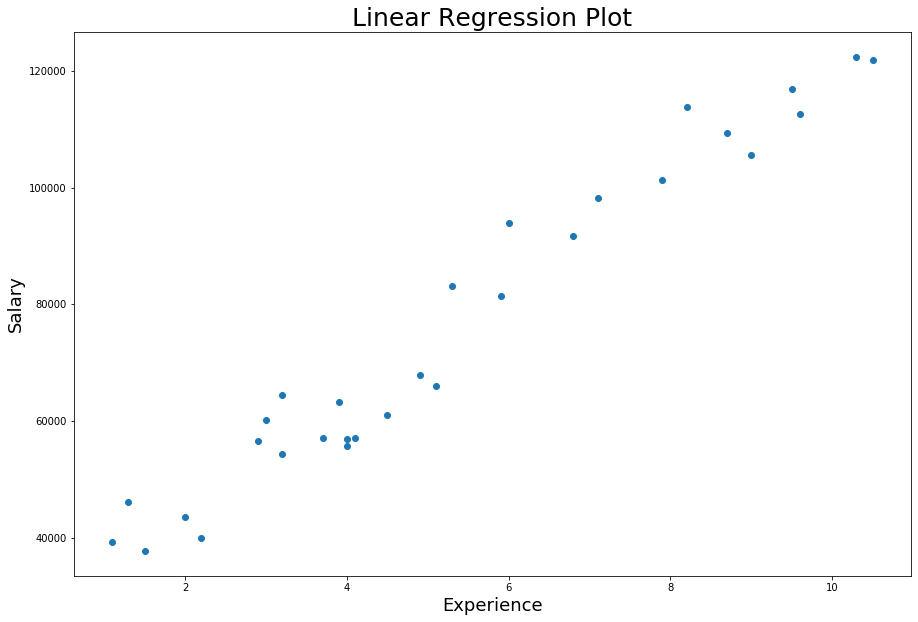

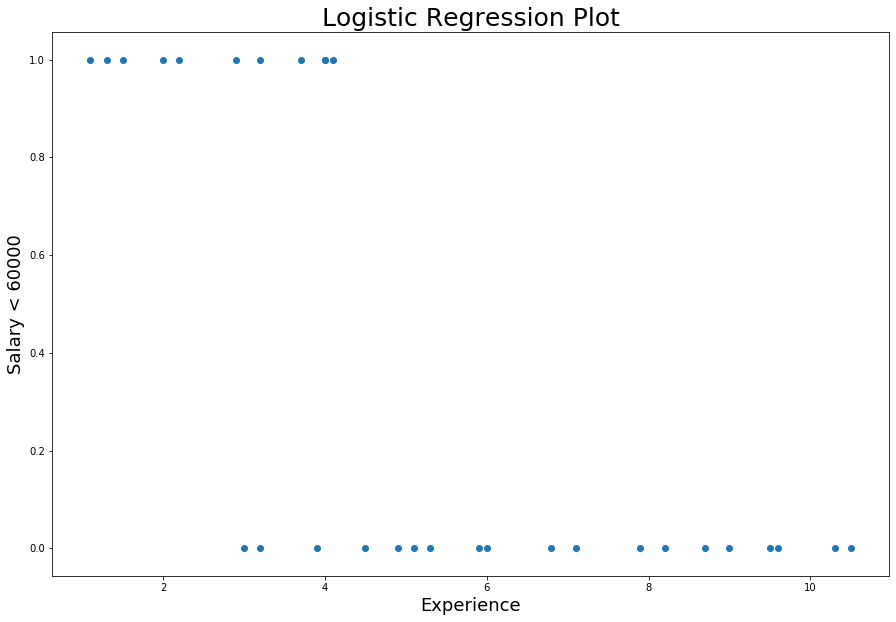

In [17]:
fig,ax1 = plt.subplots()

ax1.scatter(x=lin_df['YearsExperience'],y=lin_df['Salary'])
ax1.set_title('Linear Regression Plot',fontsize=25)
ax1.set_xlabel('Experience',fontsize=18)
ax1.set_ylabel('Salary',fontsize=18)
plt.show()


fig,ax2 = plt.subplots()
ax2.scatter(x=log_df['YearsExperience'],y=log_df['Salary<60000'],)
ax2.set_title('Logistic Regression Plot',fontsize=25)
ax2.set_xlabel('Experience',fontsize=18)
ax2.set_ylabel('Salary < 60000',fontsize=18)
plt.show()

## Task 1a - Linear Regressor
Code your own Linear Regressor here, and fit it to your training data. You will be predicting salary based on years of experience.

### Optimise RMSE

Slope:  9072.771586741994
Intercept:  27754.673313869196
RMSE @ final iteration:  5884.726823179124
R ^ 2:  0.1992856491942433


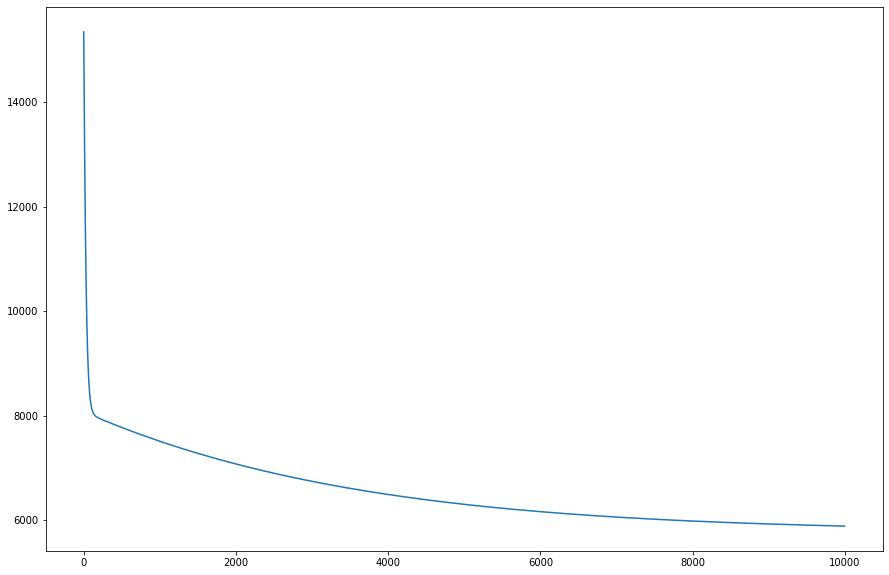

In [48]:
rate = 0.001
size = lin_df_train.shape[0]

x = np.array(lin_df_train['YearsExperience'])
y = np.array(lin_df_train['Salary'])
y_bar = np.mean(y)

slope = (y[5]-y[0])/(x[5]-x[0])
intercept = y[0]
ss_tot = 0.0
ss_res = 0.0

error1 = 1
error2 = 1
rmse = []
r_2 = []
iter = 0

while iter < 10000:
    error1 = 0.0
    error2 = 0.0
    ss_tot = 0.0
    ss_res = 0.0
    rmse.append(0.0)
    r_2.append(0.0)
    ss = 0
    for i in range(size):
        ss_tot += (y[i] - y_bar) ** 2
        
        pred = (x[i] * slope) + intercept
        
        ss_res += (pred  - y_bar) ** 2
        error1 += y[i] - pred
        error2 += ((y[i] - pred) * x[i])
        rmse[iter] += (y[i] - pred) ** 2
        
    r_2[iter] = 1 - ss_res/ss_tot
    rmse[iter] /= size
    rmse[iter] = rmse[iter] ** 0.5
    
    intercept = intercept + ((rate / size)*error1)
    slope = slope + ((rate / size) * error2)
    
    iter += 1
    
print('Slope: ',slope)
print('Intercept: ',intercept)
print('RMSE @ final iteration: ',rmse[iter-1])

print('R ^ 2: ',r_2[iter-1])

plt.plot(rmse)#,x=[i for i in range(len(rmse))])
plt.show()

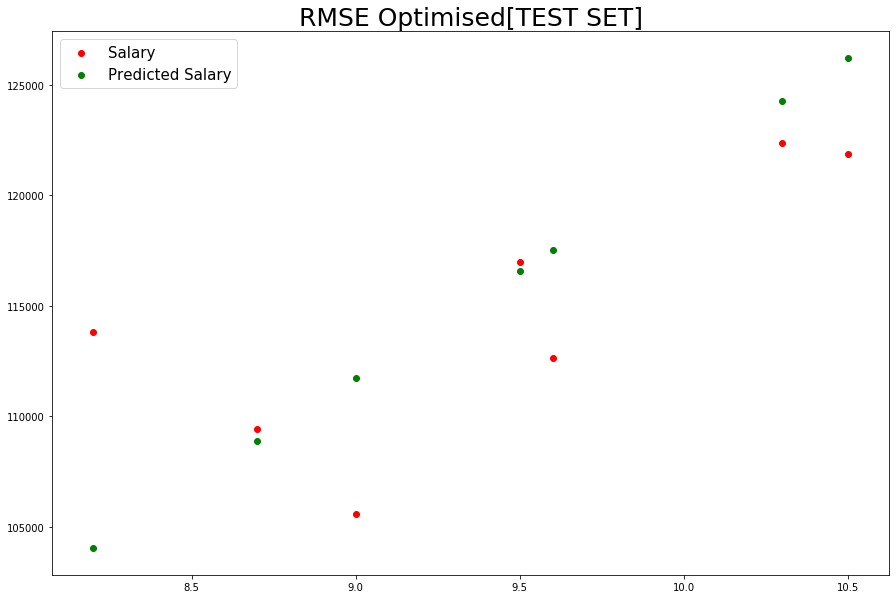

In [20]:
fig,ax3 = plt.subplots()


x1 = np.array(lin_df_test['YearsExperience'])
y1 = slope * x1 + intercept
ax3.scatter(x=lin_df_test['YearsExperience'],y=lin_df_test['Salary'],label='Salary',c='red')
ax3.set_title('RMSE Optimised[TEST SET]',fontsize=25)
ax3.scatter(y=y1,x=x1,c='green',label='Predicted Salary')
ax3.legend(loc='upper left',fontsize=15)
plt.show()

### Optimising absolute error

Slope:  9213.613192333938
Intercept:  27384.894248930923


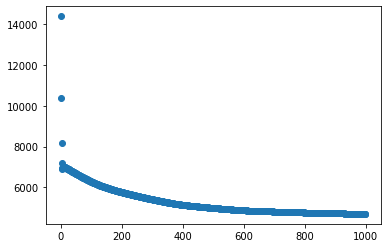

In [32]:

rate = 0.01
size = lin_df.shape[0]

x = np.array(lin_df['YearsExperience'])
y = np.array(lin_df['Salary'])

slope = (y[5]-y[0])/(x[5]-x[0])
intercept = y[0]

error1 = 1
error2 = 1
mae = []
iter = 0

while iter < 1000:
    error1 = 0.0
    error2 = 0.0
    mae.append(0.0)
    for i in range(size):
        pred = (x[i] * slope) + intercept
        error1 += (y[i] - pred)
        error2 += (y[i] - pred)* x[i]
        mae[iter] += abs(y[i] - pred) 
    
    mae[iter] /= size
    
    intercept = intercept + ((rate / size) * error1)
    slope = slope + ((rate / size) * error2)
    iter +=1 

print('Slope: ',slope)
print('Intercept: ',intercept)
#print('RMSE @ final iteration: ',rmse[iter])

plt.scatter(y=mae,x=[i for i in range(len(mae))])
plt.show()

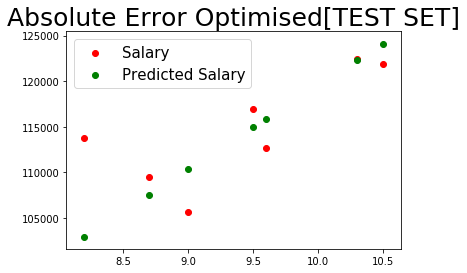

In [33]:
fig,ax4 = plt.subplots()

x1 = np.array(lin_df_test['YearsExperience'])
y1 = slope * x1 + intercept
ax4.scatter(x=lin_df_test['YearsExperience'],y=lin_df_test['Salary'],label='Salary',c='red')
ax4.set_title('Absolute Error Optimised[TEST SET]',fontsize=25)
ax4.scatter(x=x1,y=y1,c='green',label='Predicted Salary')
ax4.legend(loc='upper left',fontsize=15)
plt.show()

## Task 1b - Logistic Regression
Code your own Logistic Regressor here, and fit it to your training data. You will first have to create a column, 'Salary<60000', which contains '1' if salary is less than 60000 and '0' otherwise. This is your target variable, which you will aim to predict based on years of experience.

### Stopping when accuracy decreases

ACCL  0.9
Slope:  -0.20537550490600937
Intercept:  0.8399486496178019


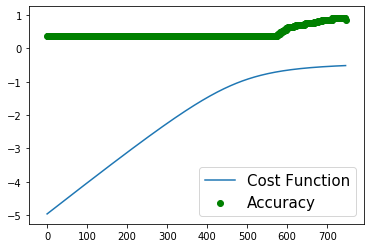

In [34]:
x0 = 1
x1 = 1
rate = 0.0005
x = np.array(log_df['YearsExperience'])
y = np.array(log_df['Salary<60000'])


def sigmoid(val):
    return (1 / (1 + np.exp((-val))))

error1 = 0.0
error2 = 0.0
acc=[]
cost = []
iter = 0



while True:
    cost.append(0.0)
    error1 = 0.0
    error2 = 0.0
    acc.append(0.0)
    
    for i in range(len(x)):
        y_pred = sigmoid(x[i] * x1 + x0)
        error1 += y_pred - y[i]
        error2 += (y_pred - y[i] )* x[i]
        cost[iter] += y[i] * np.log(y_pred) + (1 - y[i]) * np.log(1 - y_pred)
        if int(y_pred > 0.5) == y[i]:
            acc[iter] += 1
            
    acc[iter] = acc[iter] / len(x)
    cost[iter] /= len(x)
    x0 = x0 - rate / len(x)  * error1 
    x1 = x1 - rate / len(x)  * error2
   
    if iter > 2:
        if acc[iter] < acc[iter - 1]:
            break
   
    
    iter += 1
    
print("ACCL ",acc[iter-1])
print("Slope: ",x1)
print("Intercept: ",x0)
    
plt.plot([i for i in range(iter+1)],cost,label='Cost Function')
plt.scatter(x=[i for i in range(iter+1)],y=acc,c='green',label='Accuracy')
plt.legend(loc='lower right',fontsize=15)
plt.show()

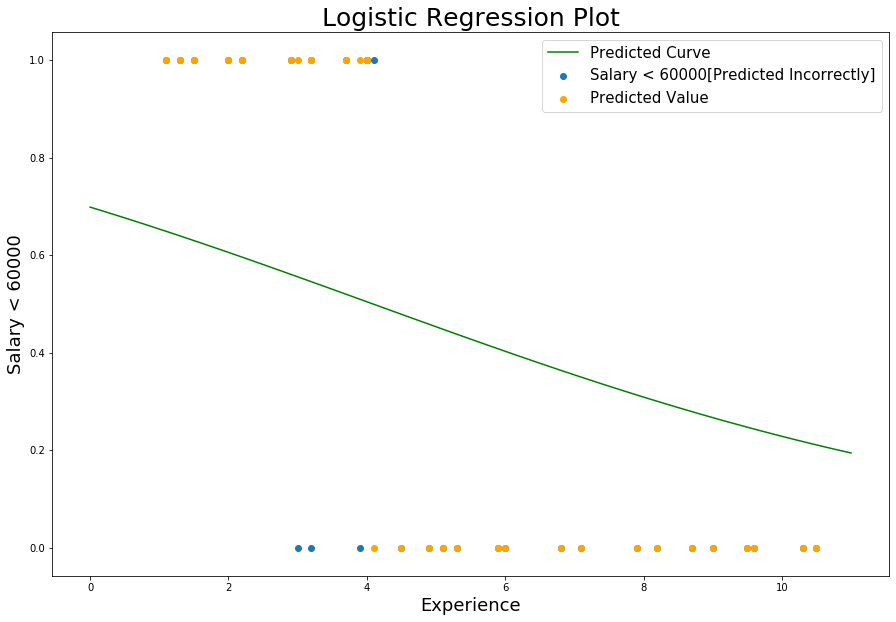

In [38]:
x_plt = np.linspace(0,11,100)
y_plt = np.array([sigmoid(xi * x1+ x0) for xi in x_plt])


fig,ax5 = plt.subplots()
ax5.scatter(x=log_df['YearsExperience'],y=log_df['Salary<60000'],label='Salary < 60000[Predicted Incorrectly]')
ax5.set_title('Logistic Regression Plot',fontsize=25)
ax5.set_xlabel('Experience',fontsize=18)
ax5.set_ylabel('Salary < 60000',fontsize=18)

x_pred = np.array(log_df['YearsExperience'])
y_pred = [int(sigmoid(xi * x1 + x0) > 0.5) for xi in x_pred]

ax5.plot(x_plt,y_plt,c='green',label='Predicted Curve')

ax5.scatter(x=x_pred,y=y_pred,c='orange',label='Predicted Value')
ax5.legend(loc= 'upper right',fontsize=15)


plt.show()

### 5000 iterations

ACCL  0.8
Slope:  -0.3920665178945363
Intercept:  0.9064013768372572


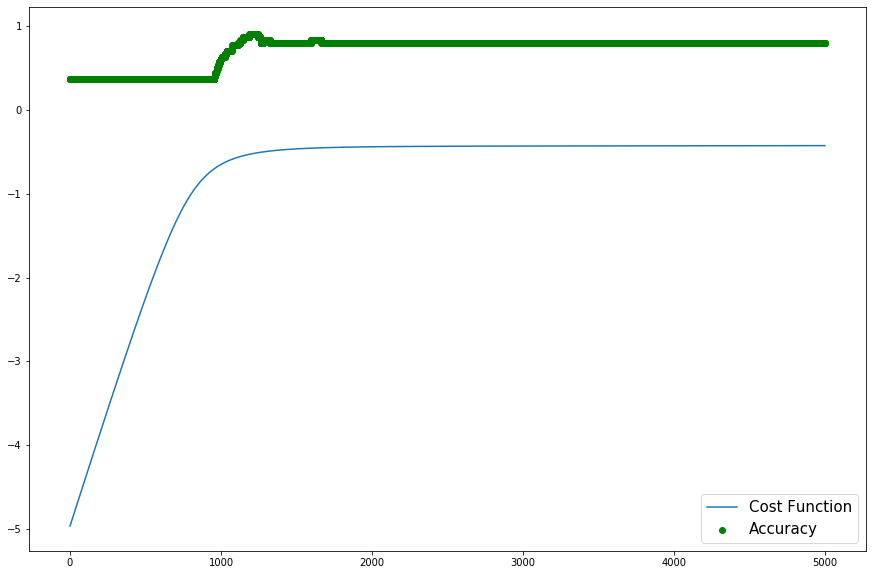

In [105]:
x0 = 1
x1 = 1
rate = 0.0003
x = np.array(log_df['YearsExperience'])
y = np.array(log_df['Salary<60000'])


def sigmoid(val):
    return (1 / (1 + np.exp((-val))))

error1 = 0.0
error2 = 0.0
acc=[]
cost = []
iter = 0



while iter < 5000:
    cost.append(0.0)
    error1 = 0.0
    error2 = 0.0
    acc.append(0.0)
    
    for i in range(len(x)):
        y_pred = sigmoid(x[i] * x1 + x0)
        error1 += y_pred - y[i]
        error2 += (y_pred - y[i] )* x[i]
        cost[iter] += y[i] * np.log(y_pred) + (1 - y[i]) * np.log(1 - y_pred)
        if int(y_pred > 0.5) == y[i]:
            acc[iter] += 1
            
    acc[iter] = acc[iter] / len(x)
    cost[iter] /= len(x)
    x0 = x0 - rate / len(x)  * error1 
    x1 = x1 - rate / len(x)  * error2
   

    iter += 1
    
print("ACCL ",acc[iter-2])
print("Slope: ",x1)
print("Intercept: ",x0)
    
plt.plot([i for i in range(iter)],cost,label='Cost Function')
plt.scatter(x=[i for i in range(iter)],y=acc,label='Accuracy',color='green')
plt.legend(loc='lower right',fontsize=15)
plt.show()

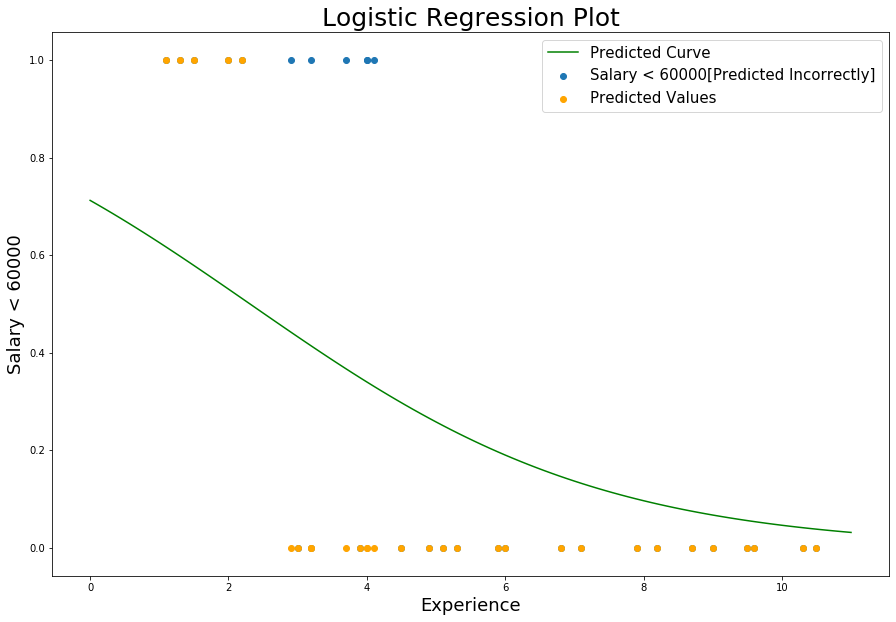

In [108]:
x_plt = np.linspace(0,11,100)
y_plt = np.array([sigmoid(xi * x1+ x0) for xi in x_plt])


fig,ax6 = plt.subplots()
ax6.scatter(x=log_df['YearsExperience'],y=log_df['Salary<60000'],label='Salary < 60000[Predicted Incorrectly]')
ax6.set_title('Logistic Regression Plot',fontsize=25)
ax6.set_xlabel('Experience',fontsize=18)
ax6.set_ylabel('Salary < 60000',fontsize=18)

x_pred = np.array(log_df['YearsExperience'])
y_pred = [int(sigmoid(xi * x1 + x0) > 0.5) for xi in x_pred]

ax6.plot(x_plt,y_plt,c='green',label='Predicted Curve')

ax6.scatter(x=x_pred,y=y_pred,c='orange',label='Predicted Values')
ax6.legend(loc= 'upper right',fontsize=15)


plt.show()

## Task 2 - Results
Analyse the quality of the ML models you built using metrics such as R2, MAE and RMSE for the Linear Regressor, and Accuracy for the Logistic Regressor. Evaluate their performance on the testing set.